Created by Chinara Siwi N.

# Kaggle Setup

In [ ]:
#Upload Kaggle API Key
from google.colab import files
files.upload()  #Upload kaggle.json

In [ ]:
#Install and Setup Kaggle API
!pip install kaggle

import shutil

# Ensure the .kaggle directory exists
!mkdir -p /root/.kaggle

# Move the uploaded kaggle.json to the .kaggle directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

In [ ]:
#Verifying the file placement
!ls /root/.kaggle

In [ ]:
!kaggle datasets download -d gorororororo23/yerevan-hotels-reservation-prices

In [ ]:
!unzip yerevan-hotels-reservation-prices.zip

Archive:  yerevan-hotels-reservation-prices.zip
  inflating: Yerevan-Hotels.csv      


# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
df = pd.read_csv('Yerevan-Hotels.csv')
df.head()

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,Kenut Hostel,NaN,9.7,Yes,No,No,No,9.9,9.8,8.8,9.7,9.8,30.0
1,Kantar Hostel,NaN,9.3,Yes,No,No,Yes,9.7,9.4,9.7,9.2,9.2,15.0
2,Sweet Sleep hostel,NaN,9.5,Yes,No,No,No,9.8,9.5,8.9,9.4,9.5,20.0
3,Royal Boutique Hotel on Kievyan,NaN,7.4,Yes,No,No,Yes,8.1,7.3,8.3,7.5,7.8,26.0
4,Areg Hotel,3.0,8.2,No,No,No,No,9.1,8.0,8.3,8.1,8.2,29.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel Names              120 non-null    object 
 1   Star Rating              79 non-null     float64
 2   Rating                   115 non-null    float64
 3   Free Parking             120 non-null    object 
 4   Fitness Centre           120 non-null    object 
 5   Spa and Wellness Centre  120 non-null    object 
 6   Airport Shuttle          120 non-null    object 
 7   Staff                    115 non-null    float64
 8   Facilities               115 non-null    float64
 9   Location                 115 non-null    float64
 10  Comfort                  115 non-null    float64
 11  Cleanliness              115 non-null    float64
 12  Price Per Day($)         120 non-null    float64
dtypes: float64(8), object(5)
memory usage: 12.3+ KB


In [ ]:
# Check missing values
df.isnull().sum()

,0
Hotel Names,0
Star Rating,41
Rating,5
Free Parking,0
Fitness Centre,0
Spa and Wellness Centre,0
Airport Shuttle,0
Staff,5
Facilities,5
Location,5


In [ ]:
# Select the numerical columns
numcol = ['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness', 'Price Per Day($)']

# Check skewness of each numerical columns
print(df[numcol].skew())

Star Rating        -0.190718
Rating             -1.694868
Staff              -1.317197
Facilities         -3.288908
Location           -0.536151
Comfort            -2.078121
Cleanliness        -1.959441
Price Per Day($)    3.898564
dtype: float64


All numerical features are skewed.

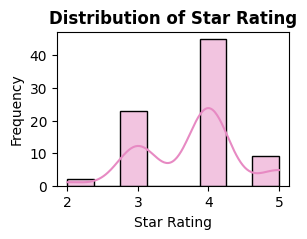

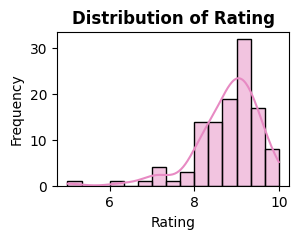

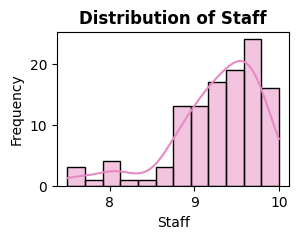

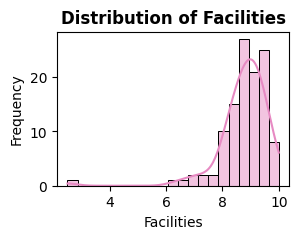

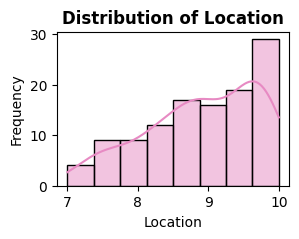

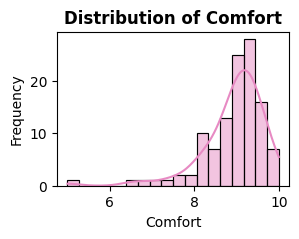

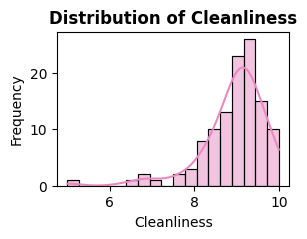

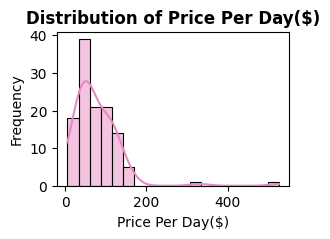

In [ ]:
# Plot the distribution of each numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in numcol:
    plt.figure(figsize=(3, 2))
    sns.histplot(df[col], kde=True,color='#e78ac3')
    plt.title(f'Distribution of {col}',fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

* The star rating distribution shows that hotels in Yerevan are mostly rated 4 or 3 stars.
* The rating, staff, facilities, location, comfort, and cleanliness distribution show that most of the values are clustered at the higher end (negatively skewed). This implies that most of the ratings are positive, but there are some occasional lower ratings.
* The price per day distribution shows that most values are clustered at the lower end of the price range. It means most hotels are affordable (less than $200) but there are also luxury hotels with higher prices.

In [ ]:
# Fill missing values with median
for col in numcol:
    df[col].fillna(df[col].median(), inplace=True)
df.isnull().sum()

,0
Hotel Names,0
Star Rating,0
Rating,0
Free Parking,0
Fitness Centre,0
Spa and Wellness Centre,0
Airport Shuttle,0
Staff,0
Facilities,0
Location,0


In [ ]:
df[['Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,120.0,8.799167,0.758536,5.0,8.5,8.9,9.3,10.0
Staff,120.0,9.267500,0.523428,7.5,9.1,9.4,9.6,10.0
Facilities,120.0,8.767500,0.887936,2.5,8.4,8.9,9.3,10.0
Location,120.0,8.912500,0.778121,7.0,8.4,8.9,9.6,10.0
Comfort,120.0,8.943333,0.729422,5.0,8.7,9.1,9.4,10.0
Cleanliness,120.0,8.943333,0.757454,5.0,8.7,9.1,9.4,10.0


* The majority of the ratings are clustered around 8.5 to 9.3 where 25% of the overall ratings are less than or equal to 8.5 with the ratings range spanning from 5.0 to 10.0
* Average ratings of the hotels in Yerevan is approx 8.8 out of 10.

In [ ]:
df[df['Rating']==5.0]

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
21,Mario in New York Hotel,5.0,5.0,Yes,Yes,Yes,No,7.5,2.5,7.5,5.0,5.0,110.0


Mario in New York Hotel got the **lowest rating** of 5.0 out of 10, which is quite low for a 5⭐ hotel. Despite offering high-end amenities (fitness and spa center), the poor ratings for facilities, comfort, and cleanliness indicate significant guest dissatisfaction.

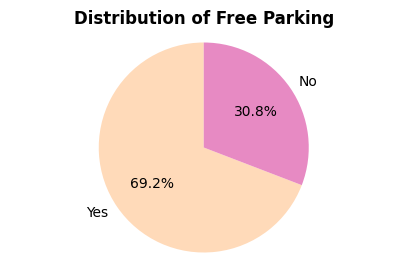

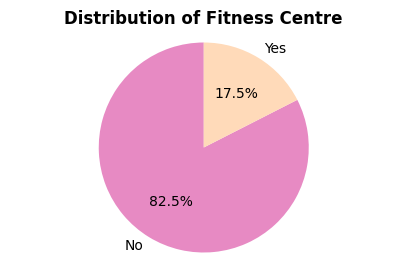

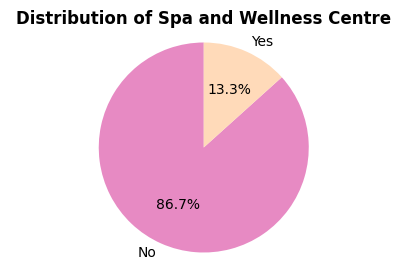

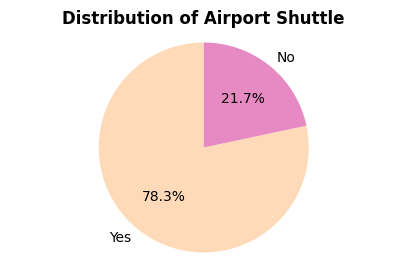

In [ ]:
catcol = ['Free Parking','Fitness Centre','Spa and Wellness Centre','Airport Shuttle']
for ccol in catcol:
  count = df[ccol].value_counts()

  # Get colors for each label based on the color_map
  color_map = {'Yes':'#FFDAB9','No':'#e78ac3'}
  colors = [color_map[label] for label in count.index]

  # Create pie charts
  plt.figure(figsize=(5, 3))
  plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=colors, startangle=90)
  plt.title(f'Distribution of {ccol}',fontweight='bold')
  plt.axis('equal')
  plt.show()

* Most hotels in Yerevan provide free parking and airport shuttle.
* Most hotels in Yerevan don't have fitness center and spa and wellness center.

In [ ]:
df['Price Per Day($)'].describe()

,Price Per Day($)
count,120.000000
mean,77.200000
std,61.391203
min,6.000000
25%,40.000000
50%,62.500000
75%,110.000000
max,525.000000


The **average price** of hotels in Yerevan is \$77.2 per day.

In [ ]:
# Hotel with the lowest price per day
df[df['Price Per Day($)'] == df['Price Per Day($)'].min()]

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
42,Erebuni Hostel,4.0,8.9,No,No,No,No,9.4,8.9,8.9,9.1,9.1,6.0


Erebuni Hostel, a 4⭐ hotel, offers the **most affordable price** in Yerevan at just $6 per day. Although the hostel lacks a fitness center, spa, free parking, and an airport shuttle, it still receives good ratings for staff service, facilities, location, comfort, and cleanliness, resulting in a high overall rating of 8.9 out of 10.

In [ ]:
# Hotel with the highest price per day
df[df['Price Per Day($)'] == df['Price Per Day($)'].max()]

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
50,Seven Visions Resort and Places the Dvin,5.0,9.5,No,Yes,No,Yes,9.4,9.5,8.8,9.6,9.6,525.0


Seven Visions Resort and Places the Dvin, a 5⭐ hotel, has the most expensive price in Yerevan at $525 per day. This hotel receives an outstanding rating of 9.5 out of 10 from visitors, which makes sense, at that price, the quality is expected to be top-notch, right?

In [ ]:
# Top 5 hotels with the highest rating
df.sort_values(by='Rating', ascending=False).head()

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
65,Vi Go Hotel,4.0,10.0,Yes,No,No,Yes,10.0,10.0,10.0,10.0,10.0,62.0
54,Luxury Aspar Apartment,4.0,10.0,Yes,No,No,No,10.0,10.0,10.0,10.0,10.0,76.0
48,Santorini,4.0,10.0,No,No,No,No,10.0,10.0,10.0,10.0,10.0,10.0
72,RG Hotel,3.0,9.9,Yes,No,No,No,9.6,9.3,10.0,9.6,9.3,64.0
100,RIS Opera Apartments Yerevan,2.0,9.8,Yes,No,No,Yes,9.9,9.7,9.9,9.8,9.9,90.0


Three 4⭐ hotels (Vi Go Hotel, Luxury Aspar Apartment, and Santorini) have perfect overall ratings of 10 out of 10, wow.

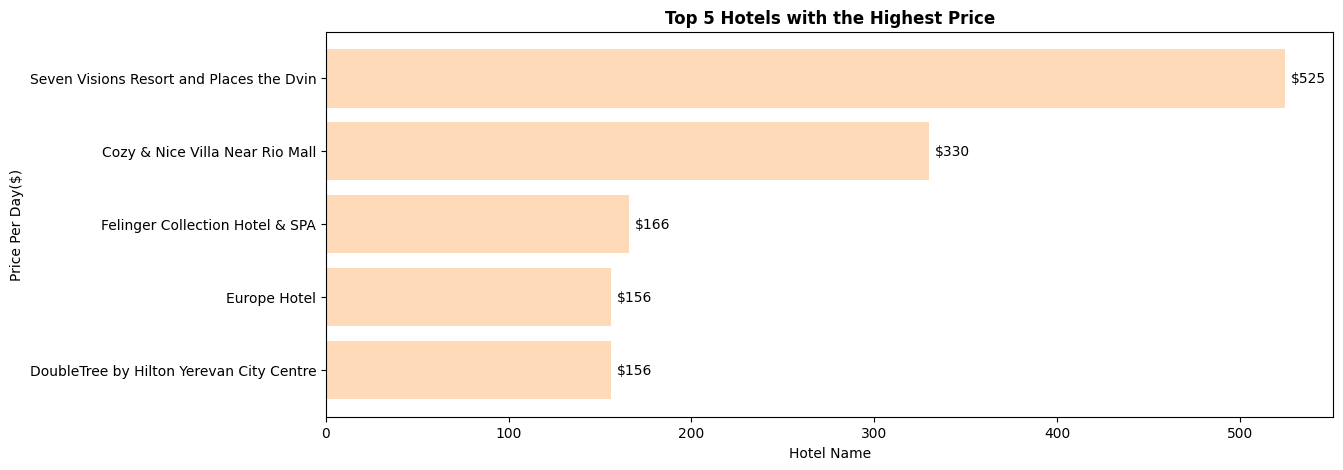

In [ ]:
# Top 5 hotels with the highest price
top5_price = df.nlargest(5, 'Price Per Day($)')

plt.figure(figsize=(13, 5))
bars = plt.barh(top5_price['Hotel Names'], top5_price['Price Per Day($)'],color = '#FFDAB9')
plt.gca().invert_yaxis()
plt.xlabel('Hotel Name')
plt.ylabel('Price Per Day($)')
plt.title('Top 5 Hotels with the Highest Price', fontweight='bold')

for bar in bars:
    plt.text(bar.get_width()+3, bar.get_y() + bar.get_height() / 2,
             f'${bar.get_width():,.0f}',
             va='center', ha='left', color='black')

plt.show()

In [ ]:
# Create a dataframe without the hotel names
df2 = df.drop(['Hotel Names'], axis=1)

# Convert categorical data into numerical
catcol = ['Free Parking','Fitness Centre','Spa and Wellness Centre','Airport Shuttle']
for ccol in catcol:
  df2[ccol] = df2[ccol].apply(lambda x: 1 if x == 'Yes' else 0)
# df2[catcol] = df2[catcol].replace({'Yes': 1, 'No': 0})

df2.head()

,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,4.0,9.7,1,0,0,0,9.9,9.8,8.8,9.7,9.8,30.0
1,4.0,9.3,1,0,0,1,9.7,9.4,9.7,9.2,9.2,15.0
2,4.0,9.5,1,0,0,0,9.8,9.5,8.9,9.4,9.5,20.0
3,4.0,7.4,1,0,0,1,8.1,7.3,8.3,7.5,7.8,26.0
4,3.0,8.2,0,0,0,0,9.1,8.0,8.3,8.1,8.2,29.0


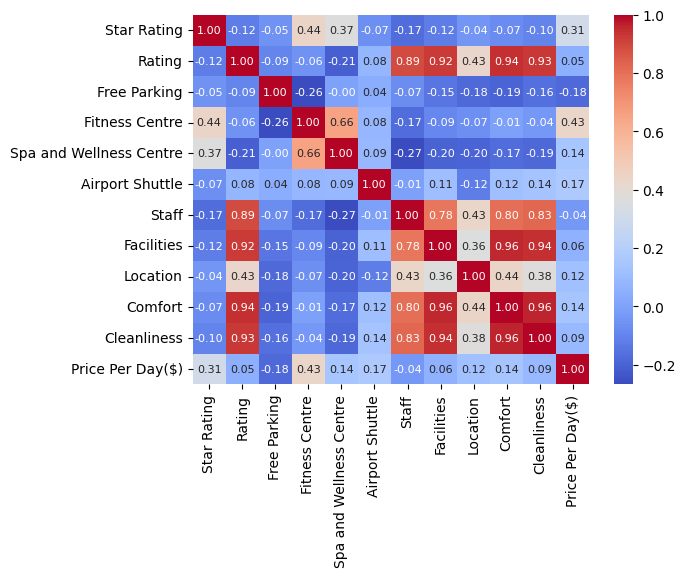

In [ ]:
# Correlation between features
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.show()

Rating, Staff, Facilities, Location, Comfort, and Cleanliness are **highly correlated** with each other. This suggests that these features are likely to contribute to visitor satisfaction and the overall hotel rating.

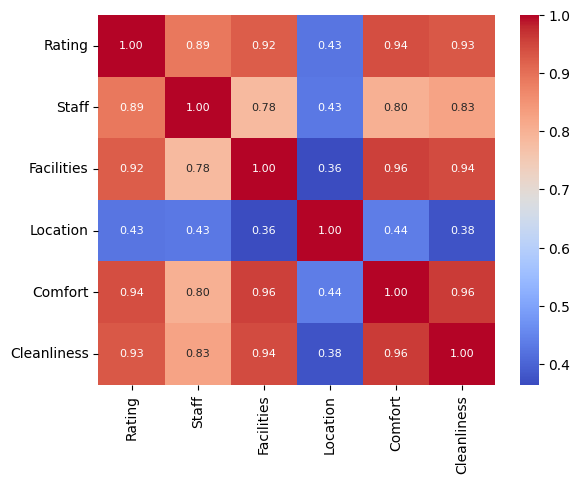

In [ ]:
# Correlation plot between rating and staff, facilities, location, comfort, cleanliness
corr_matrix = df[['Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.show()

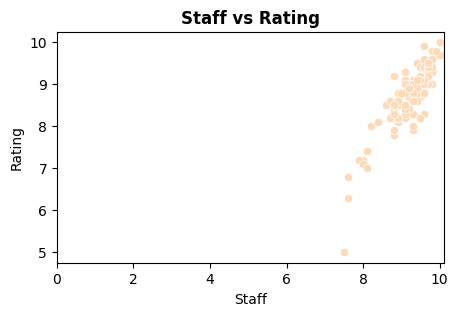

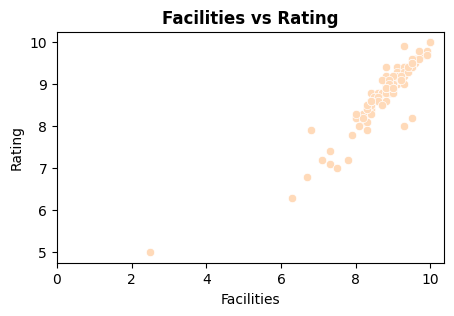

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Staff', y='Rating', color = '#FFDAB9')
plt.title('Staff vs Rating', fontweight='bold')
plt.xlim(left=0) # Set the x-axis limit to start at 0
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Facilities', y='Rating', color = '#FFDAB9')
plt.title('Facilities vs Rating', fontweight='bold')
plt.xlim(left=0) # Set the x-axis limit to start at 0
plt.show()

The scatter plots show a **positive correlation** between ratings and both staff quality and facilities. This indicates that as the quality of staff and facilities increases, the overall rating from visitors tends to be higher.
* Better quality staffs are likely to provide more friendly, more professional, or more effective customer service which contributing to a more positive service experience and consequently higher ratings.
* The better the quality and variety of facilities provided by the hotel, the higher the rating visitors are likely to give.

In [ ]:
# Average price by hotel star rating
df.groupby('Star Rating')['Price Per Day($)'].mean()

,Price Per Day($)
Star Rating,
2.0,65.000000
3.0,55.456522
4.0,74.982558
5.0,156.666667


* The average price of a 2⭐ hotel in Yerevan is \$65
* The average price of a 3⭐ hotel in Yerevan is \$55
* The average price of a 4⭐ hotel in Yerevan is \$74
* The average price of a 5⭐ hotel in Yerevan is \$156

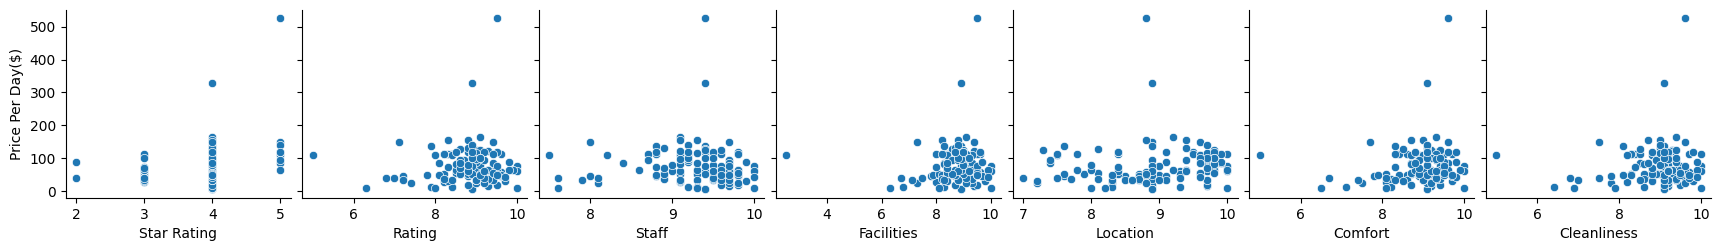

In [ ]:
# Generate pairplot
numcol = ['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness', 'Price Per Day($)']
sns.pairplot(df[numcol], x_vars=numcol[:-1], y_vars='Price Per Day($)')
plt.show()

The correlations between Price Per Day ($) and other numeric features seem to indicate a **non-linear relationship**. Therefore, a Random Forest model will be used.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset
X = df2.drop('Price Per Day($)', axis=1)
y = df2['Price Per Day($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1734.32
Mean Absolute Error: 32.16
R-squared: 0.12


In [ ]:
# Features Importance
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)
importances_df

,Feature,Importance
0,Star Rating,0.142089
9,Comfort,0.129564
6,Staff,0.129416
8,Location,0.120255
1,Rating,0.117460
3,Fitness Centre,0.113816
7,Facilities,0.087207
10,Cleanliness,0.061274
5,Airport Shuttle,0.054684
2,Free Parking,0.036690


Hotel star rating is the **most influential factor** in predicting price per day, then followed by the hotel comfort, staff quality, and so on.